In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as ax
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

data=pd.read_csv("dataa.csv")
print(data)

    year  month  day     dep_time  sched_dep_time  dep_delay     arr_time  \
0   2013      2   26   6:07:00 PM            1630         97   7:56:00 PM   
1   2013      8   17   2:59:00 PM            1445         14   6:01:00 PM   
2   2013      2   13   6:12:00 PM            1815         -3   8:55:00 PM   
3   2013      4   11   9:22:00 PM            2115          7  11:39:00 PM   
4   2013      8    5   6:32:00 PM            1835         -3   9:45:00 PM   
5   2013      6   30   3:00:00 PM            1505         -5   5:51:00 PM   
6   2013      2   14   2:42:00 PM            1445         -3   6:33:00 PM   
7   2013      7   25   7:52:00 AM             755         -3  10:37:00 AM   
8   2013      7   10   5:57:00 AM             600         -3   7:25:00 AM   
9   2013     12   13   7:07:00 PM            1915         -8   9:55:00 PM   
10  2013      1   28   2:55:00 PM            1500         -5   4:47:00 PM   
11  2013      9    6   9:03:00 AM             912         -9  10:51:00 AM   

#      DATA REDUCTION USING PRINCIPAL COMPONENT ANALYSIS (PCA)

In [2]:
features = ['sched_dep_time','dep_delay','sched_arr_time','arr_delay','air_time','distance']

x = data.loc[:,features].values
y = data.loc[:,['origin']].values

x = StandardScaler().fit_transform(x)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [3]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5'])

finalDf = pd.concat([principalDf, data['origin']], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,origin
0,1.949853,2.422058,0.934427,0.066779,-0.250057,EWR
1,0.463648,0.274560,-0.130544,-0.121059,0.098098,LGA
2,2.343882,-2.556317,-0.126131,0.121054,-0.227473,EWR
3,2.097830,-0.946093,-1.187203,0.110918,-0.107189,JFK
4,2.779258,-2.564467,0.216424,0.032638,0.210191,JFK


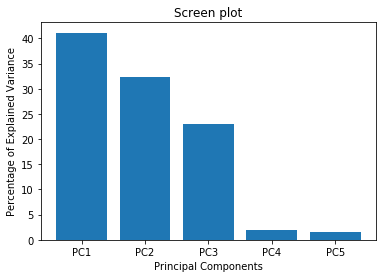

In [4]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals =2)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

plt.bar(x = range(1,len(per_var)+1),height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Screen plot')
plt.show()

In [5]:
finalDf['origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

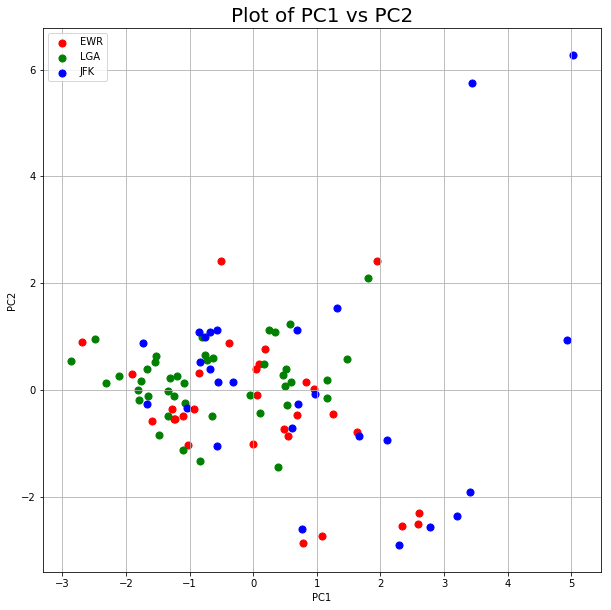

In [6]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['EWR', 'LGA', 'JFK']
       

colors = ['r', 'g', 'b']

for origin, color in zip(targets,colors):
    indicesToKeep = finalDf['origin'] == origin 
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'] ,
                finalDf.loc[indicesToKeep, 'PC2'] ,
                c = color ,
                s = 50)
    
ax.legend(targets)
ax.grid()

In [7]:
pca.explained_variance_ratio_

array([0.41143797, 0.32358921, 0.22958406, 0.01868568, 0.01537129])

The Variances obtained by the Principal Component analysis (PCA) Method classified according to the decreased order.

#                                         CLUSTERING ANALYSIS

In [8]:
x = data.iloc[:, [4,5,7,8,14,15]].values

kmeans6 = KMeans(n_clusters=6)
y_kmeans6 = kmeans6.fit_predict(x)
print(y_kmeans6)

kmeans6.cluster_centers_

[5 5 2 3 2 5 5 4 4 3 0 4 4 4 4 4 4 4 1 5 3 0 4 4 5 4 4 0 2 4 0 3 4 3 5 3 4
 5 3 4 4 3 1 5 5 5 5 1 0 4 0 4 3 4 4 3 4 4 4 1 4 5 2 4 5 4 0 5 0 5 4 3 5 5
 0 2 0 4 1 3 5 0 0 2 3 2 4 3 3 2 3 5 4 3 5 1 0 1 1]


array([[ 1.71153846e+03,  1.26923077e+01,  1.88638462e+03,
         1.92307692e+00,  6.80000000e+01,  3.85230769e+02],
       [ 7.76625000e+02, -2.37500000e+00,  1.11750000e+03,
        -1.33750000e+01,  2.50125000e+02,  1.86650000e+03],
       [ 1.85225000e+03,  1.73750000e+01,  2.17500000e+03,
         1.75000000e+00,  3.35375000e+02,  2.46787500e+03],
       [ 1.91223529e+03,  2.14117647e+01,  2.19047059e+03,
         8.70588235e+00,  1.47117647e+02,  1.05270588e+03],
       [ 8.28093750e+02, -1.21875000e+00,  9.68656250e+02,
        -6.65625000e+00,  1.14468750e+02,  7.52093750e+02],
       [ 1.37442857e+03,  9.90476190e+00,  1.62700000e+03,
         1.15714286e+01,  1.54047619e+02,  1.00223810e+03]])

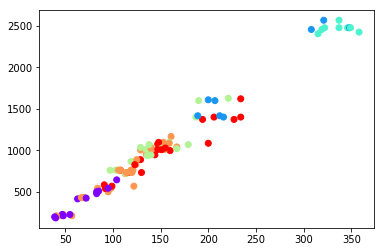

In [9]:
plt.scatter(x[:,4], x[:,5], c=y_kmeans6,cmap='rainbow')

This is the graph obtained when K-Means = 6 which is assumed according to the variables.

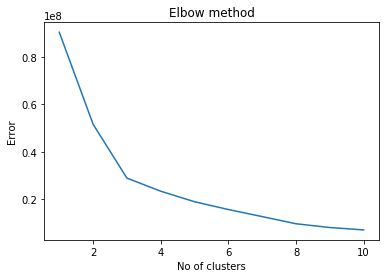

In [10]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

This method is used to find the approximate K-Mean value by visualization.

In [11]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[2 2 1 1 1 2 2 0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 2 1 0 2 2 0 2 1 2 0
 2 2 0 0 2 1 2 0 2 2 1 2 0 2 0 2 0 0 2 0 0 0 0 0 2 1 0 2 0 2 2 2 2 0 2 2 2
 2 1 2 0 0 2 2 2 2 1 2 1 0 2 1 1 2 2 0 2 0 1 2 0 0]


array([[ 8.35600000e+02, -9.00000000e-01,  1.01137500e+03,
        -5.65000000e+00,  1.27150000e+02,  8.51325000e+02],
       [ 1.63214286e+03,  1.02857143e+01,  1.95342857e+03,
        -7.28571429e+00,  3.07500000e+02,  2.29150000e+03],
       [ 1.66393333e+03,  1.57777778e+01,  1.89915556e+03,
         9.73333333e+00,  1.23911111e+02,  8.12422222e+02]])

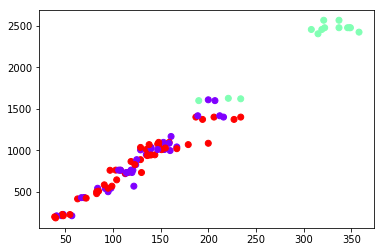

In [12]:
plt.scatter(x[:,4], x[:,5], c=y_kmeans3,cmap='rainbow')

In [ ]:
This is the graph depicting the K-Means = 3 which is obtained by Elbow Method

From the analysis we have clustered the data according means and is being depicted using 3 colors.

#                                 MULTIPLE LINEAR REGRESSION

In [13]:
print("                SUMMARY OF THE DATA ")
print(data.describe())

X = data[['sched_dep_time','sched_arr_time']].astype(float) # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = data['air_time'].astype(float) # output variable (what we are trying to predict)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('\n          Air Time')
print('\nIntercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

                SUMMARY OF THE DATA 
         year      month        day  sched_dep_time   dep_delay  \
count    99.0  99.000000  99.000000       99.000000   99.000000   
mean   2013.0   5.747475  15.919192     1324.757576    8.262626   
std       0.0   3.485666   8.887823      499.155963   37.000437   
min    2013.0   1.000000   1.000000      515.000000  -11.000000   
25%    2013.0   2.000000  10.000000      829.500000   -5.000000   
50%    2013.0   5.000000  16.000000     1350.000000   -3.000000   
75%    2013.0   9.000000  23.000000     1812.500000    2.000000   
max    2013.0  12.000000  31.000000     2155.000000  235.000000   

       sched_arr_time   arr_delay       flight    air_time     distance  
count       99.000000   99.000000    99.000000   99.000000    99.000000  
mean      1548.131313    1.111111  1913.484848  151.181818  1037.303030  
std        527.397260   38.698175  1593.206453   79.341083   621.245087  
min         43.000000  -53.000000     7.000000   39.000000   18

In [14]:
reg = ols("Y ~ X", data=data).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.284
Date:                Tue, 31 Mar 2020   Prob (F-statistic):             0.0165
Time:                        09:13:41   Log-Likelihood:                -568.74
No. Observations:                  99   AIC:                             1143.
Df Residuals:                      96   BIC:                             1151.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     97.5727     24.069      4.054      0.0

The Summary of the Regression Model using the OLS Model.

In [15]:
Y_pred=regr.predict(X)
res=data["air_time"]-Y_pred
print(Y_pred)

[158.03313696 160.77909683 171.34193135 173.54234503 172.68867793
 149.65651311 160.77909683 142.29053271 122.97448106 173.53492569
 150.33338418 138.46997379 123.70424261 130.83269339 135.02971782
 141.14114505 -15.93470532 125.1674754  147.15539787 155.34621557
 160.48380005 151.46598249 142.05077663 136.37199129 152.55162644
 136.06261928 131.48137033 164.20648501 178.10057251 139.45956665
 149.79048821 167.29490792 137.587413   165.61354142 152.95936008
 167.14323203 140.34821155 158.03642285 173.70311515 134.81325899
 143.42264335 168.88028725 150.33533485 156.77404677 142.21379342
 154.23964884 149.51162089 142.78753375 160.71613678 128.91485671
 166.6140514  127.54362566 174.93806054 146.41906453 123.42929685
 174.1554085  138.80452982 143.65847786 141.47290286 134.64345853
 141.2744206  165.48200465 177.37430874 138.80103204 150.16029783
 131.0272541  153.52779996 162.24932518 163.36394692 153.30182312
 131.89378898 165.38504213 154.55425741 155.9632006  162.66259138
 172.32522

In [16]:
print(" PREDICTION OF AIR TIME\n")
#df = pd.DataFrame({'Actual':data['score'], 'Predicted': y_pred})
df = pd.DataFrame({'Actual':data['air_time'], 'Predicted': Y_pred})
print(df)

 PREDICTION OF AIR TIME

    Actual   Predicted
0      144  158.033137
1      147  160.779097
2      315  171.341931
3      221  173.542345
4      358  172.688678
5      116  149.656513
6      200  160.779097
7      140  142.290533
8      113  122.974481
9      138  173.534926
10      83  150.333384
11     138  138.469974
12      48  123.704243
13      98  130.832693
14     139  135.029718
15     153  141.141145
16     129  -15.934705
17      46  125.167475
18     207  147.155398
19     108  155.346216
20     119  160.483800
21      47  151.465982
22     167  142.050777
23      57  136.371991
24     160  152.551626
25     161  136.062619
26      84  131.481370
27      85  164.206485
28     346  178.100573
29     124  139.459567
..     ...         ...
69     130  153.301823
70     121  131.893789
71     135  165.385042
72     155  154.554257
73     123  155.963201
74      39  162.662591
75     349  172.325228
76      72  156.506308
77     140  139.231703
78     212  141.998586
79     12

The predicted values of Air time is obtained, which is the total time taken by the flight to reach its destination. The predictions obtained are partially similar with a slight increase and decrease from the Actual values. Here, we have taken the Arrival time and the Departure time to calculate the total time taken to reach its destination by fitting the Multiple Linear Regression Model.

                       GRAPH 


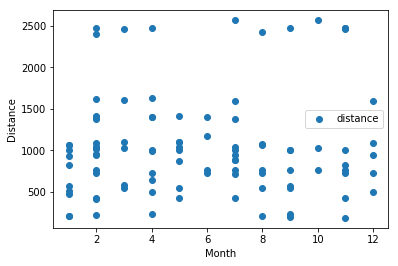

In [17]:
data.plot(x='month', y='distance', style='o')
print("                       GRAPH ")
plt.xlabel('Month')  
plt.ylabel('Distance')
plt.show()

The graph depicts the distance travelled by the filghts with respect to each month.

#                                          LINEAR REGRESSION

In [18]:
X= data[['flight']].astype(float)
y = data['distance'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

print("Intercept:",regressor.intercept_)
#For retrieving the slope:
print("Coefficients:",regressor.coef_)

Intercept: [1419.83964457]
Coefficients: [[-0.19227002]]


In [19]:
y_pred = regressor.predict(X_test)

In [20]:
print("   PREDICTION OF DISTANCE\n")
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

   PREDICTION OF DISTANCE

    Actual    Predicted
0      544  1018.956662
1      733  1336.394458
2     2402  1418.493754
3     1035   964.159707
4     2475  1340.432128
5      762   719.207707
6     1005  1338.124888
7      828  1301.593585
8      212   684.599104
9     1010  1059.333365
10     950  1057.410665
11    1372  1063.563305
12    1416  1298.709535
13     544  1144.316712
14    1035   959.352957
15     431   564.814884
16    1041  1354.275569
17     997  1288.326954
18     725   980.694928
19     719   791.693503


The Predicted values of the Distance with respect to Flight number. There occurs an increase in the distance for some flights alone, but decrease of distance occurred in rare cases only. Thus we find there always is an insrease in the Disatnce travelled by the Flights by fitting Linear Regression Model.